1. install packages for CUDA GPU 
- CUDA toolkit 10.2 and CuDNN v8.0.5
- cuda toolkit: https://developer.nvidia.com/cuda-10.2-download-archive?target_os=Windows&target_arch=x86_64&target_version=10&target_type=exelocal
- cudnn: https://developer.nvidia.com/rdp/cudnn-archive

- Follow: https://pub.towardsai.net/installing-pytorch-with-cuda-support-on-windows-10-a38b1134535e

2. install pytorch 1.7.x (pytorch.org) with cuda 10.2 on Windows
```
pip install torch===1.7.1 torchvision===0.8.2 torchaudio===0.7.2 -f https://download.pytorch.org/whl/torch_stable.html
```

In [1]:
import torch

In [2]:
torch.cuda.is_available()

True

In [34]:
import scipy.stats as stats

import pyro.distributions as dist
import numpy as np
import torch as th
import matplotlib.pyplot as plt

In [43]:
a, b = 5, 2
beta = dist.Beta(concentration1=a, concentration0=b)
beta.rsample()

tensor(0.8443)

In [44]:
eps = 1e-7
x = torch.linspace(0+eps, 1-eps, 100)  # beta is not defined at {0, 1}
logp = beta.log_prob(x)  
# logp, np.exp(logp)

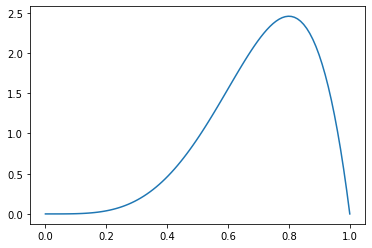

In [45]:
plt.plot(x, np.exp(logp));

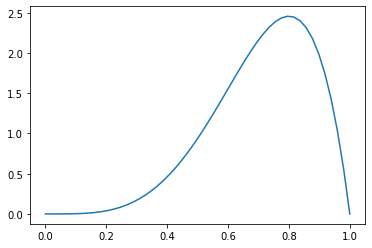

In [47]:
x = np.linspace(0,1,50)
plt.plot(x, stats.beta(a=a, b=b).pdf(x));

In [51]:
import pyro
import pyro.distributions as dist
from pyro.infer import NUTS, MCMC

def model(ntheta, inds):
    with pyro.plate('ntheta', ntheta):
        theta = pyro.sample('theta', dist.Beta(2,3))
        
    return theta[inds]

In [56]:
ntheta = 5
inds = np.random.randint(low=0, high=ntheta, size=10)
print(inds)
model(5, inds)

[2 3 1 3 1 3 4 2 2 3]


tensor([0.6649, 0.4658, 0.4474, 0.4658, 0.4474, 0.4658, 0.2579, 0.6649, 0.6649,
        0.4658])